<a href="https://colab.research.google.com/github/JesseChildress/Mental_Health_in_Tech/blob/main/Project_2%2C_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#First Choice Data Set
df = pd.read_csv('/content/Mental Health in Tech.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
#deleted duplicate rows
df.duplicated().sum()


0

No Duplicates

In [ ]:
#deleted unnecessary columns
#this column will have no effect on the outcome
del df['Timestamp']
#this column will have no effect on the outcome
del df['comments']
#While this column could have some relevance, it is likely to be minimal and nearly half the values are missing anyway
del df['state']
#Most are from the US; the few outliers are likely to have little effect on the overall analysis
del df['Country']

In [ ]:
#identified and addressed missing values : work_interfere, self_employed
#I'm going to fill both columns with "Unknown" so that we can use that data but the data
#for these columns won't skew the data
df['work_interfere'].fillna("Unknown", inplace = True)
df['self_employed'].fillna("Unknown", inplace = True)

In [ ]:
#confirming all values filled in 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1259 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [ ]:
#identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)
print(df['Gender'].value_counts())
print(df['self_employed'].value_counts())
print(df['family_history'].value_counts())
print(df['treatment'].value_counts())
print(df['work_interfere'].value_counts())
print(df['no_employees'].value_counts())
print(df['remote_work'].value_counts())
print(df['tech_company'].value_counts())
print(df['benefits'].value_counts())
print(df['care_options'].value_counts())
print(df['wellness_program'].value_counts())
print(df['seek_help'].value_counts())
print(df['anonymity'].value_counts())
print(df['leave'].value_counts())
print(df['mental_health_consequence'].value_counts())
print(df['coworkers'].value_counts())
print(df['supervisor'].value_counts())
print(df['mental_health_interview'].value_counts())
print(df['phys_health_consequence'].value_counts())
print(df['phys_health_interview'].value_counts())
print(df['mental_vs_physical'].value_counts())
print(df['obs_consequence'].value_counts())


Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
cis-female/femme                                    1
Guy (-ish) ^_^                                      1
Trans woman                                         1
male leaning androgynous    

The Only one with inconsistencies is Gender. I will address inconsistencies by putting anything that evidently should be "Male" or "Female" into those categories, and add others that are unclear or non-traditional into a third, "other" category. While this will not represent the divesity of gender identities it will be a way to get a reasonable sample size that represents a different experience other than either identifying as male or female

In [ ]:
df['Gender'].str.strip()


0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: Gender, Length: 1259, dtype: object

In [ ]:
df['Gender'].replace(to_replace = 'female', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'F', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'f', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'Woman', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'Female ', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'male', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'M', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'm', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Make', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Male ', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Cis Male', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Man', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Male-ish', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Guy (-ish) ^_^', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'something kinda male?', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Cis Female', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'msle', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'maile', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Mal', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'ostensibly male, unsure what that really means', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'cis male', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Malr', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'male leaning androgynous', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Cis Man', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Mail', value = 'Male', inplace = True)
df['Gender'].replace(to_replace = 'Female (trans)', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Female (cis)', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'cis-female/femme', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'femail', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'Femake', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'woman', value = 'Female', inplace = True)
df['Gender'].replace(to_replace = 'non-binary', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Genderqueer', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'queer', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Trans-female', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Neuter', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Androgyne', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'p', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'A little about you', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Agender', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'fluid', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Nah', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Trans woman', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'queer/she/they', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'All', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Enby', value = 'Other', inplace = True)
df['Gender'].replace(to_replace = 'Male (CIS)', value = 'Other', inplace = True)


print(df['Gender'].value_counts())


Male      994
Female    247
Other      18
Name: Gender, dtype: int64


In [ ]:
#produced univariate visuals for the target and all features
#df.boxplot(column = 'Age');
#df['Age'].hist();
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

When making univariate visuals I discovered that some of the Age inputs are nonsensical. There are 8 Age inputs that are bad, I am choosing to drop those rows for two reasons: 1, it is a miniscule percentage of the overall data, 2, anyone who puts something like that for their age is less likely to have answered seriously and are likely to skew the data anyway.

In [ ]:
df['Age'].replace(to_replace = -1, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = -1726, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = -29, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = 329, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = 5, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = 8, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = 11, value = np.NaN, inplace = True)
df['Age'].replace(to_replace = 99999999999, value = np.NaN, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1251 non-null   float64
 1   Gender                     1259 non-null   object 
 2   self_employed              1259 non-null   object 
 3   family_history             1259 non-null   object 
 4   treatment                  1259 non-null   object 
 5   work_interfere             1259 non-null   object 
 6   no_employees               1259 non-null   object 
 7   remote_work                1259 non-null   object 
 8   tech_company               1259 non-null   object 
 9   benefits                   1259 non-null   object 
 10  care_options               1259 non-null   object 
 11  wellness_program           1259 non-null   object 
 12  seek_help                  1259 non-null   object 
 13  anonymity                  1259 non-null   objec

In [ ]:
df.dropna(0, how = 'any', inplace = True)


In [ ]:
df['Age'] = df['Age'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   self_employed              1251 non-null   object
 3   family_history             1251 non-null   object
 4   treatment                  1251 non-null   object
 5   work_interfere             1251 non-null   object
 6   no_employees               1251 non-null   object
 7   remote_work                1251 non-null   object
 8   tech_company               1251 non-null   object
 9   benefits                   1251 non-null   object
 10  care_options               1251 non-null   object
 11  wellness_program           1251 non-null   object
 12  seek_help                  1251 non-null   object
 13  anonymity                  1251 non-null   object
 14  leave   

In [ ]:
df['Age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
54     3
57     3
47     2
60     2
61     1
62     1
65     1
58     1
53     1
72     1
Name: Age, dtype: int64

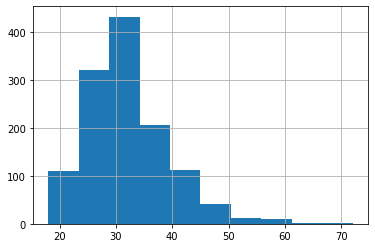

In [ ]:
df['Age'].hist();


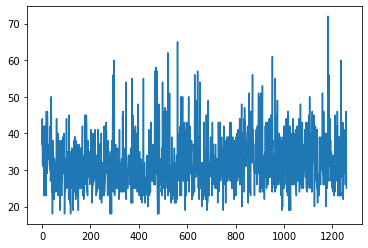

In [ ]:
plt.plot(df['Age'])

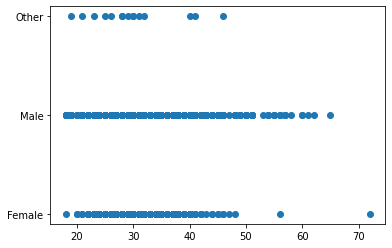

In [ ]:
plt.scatter(df['Age'], df['Gender'])

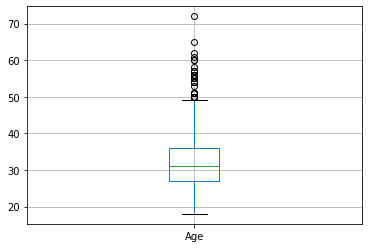

In [ ]:
df.boxplot(column = 'Age');

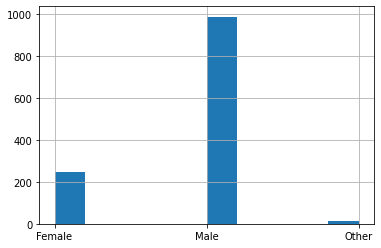

In [ ]:
df['Gender'].hist();


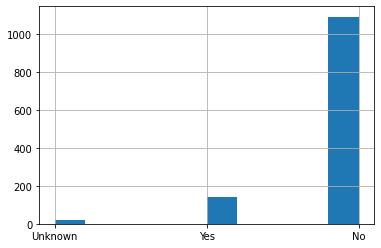

In [ ]:
df['self_employed'].hist();

  

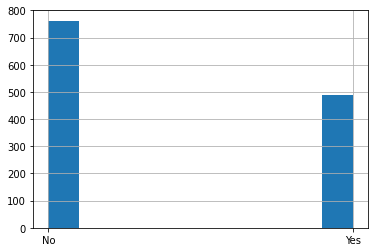

In [ ]:
df['family_history'].hist();


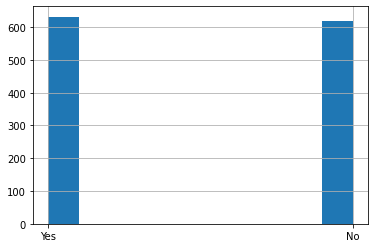

In [ ]:
df['treatment'].hist()


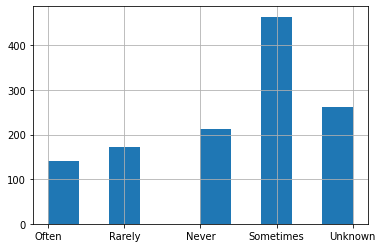

In [ ]:
df['work_interfere'].hist()


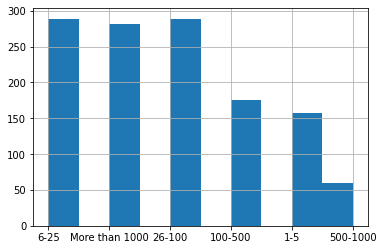

In [ ]:
df['no_employees'].hist();


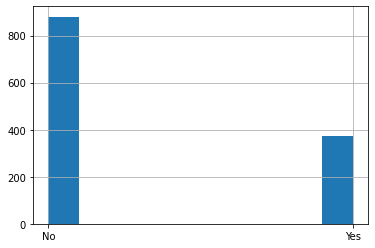

In [ ]:
df['remote_work'].hist();


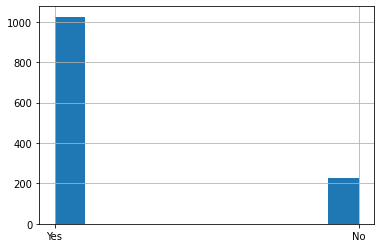

In [ ]:
df['tech_company'].hist();


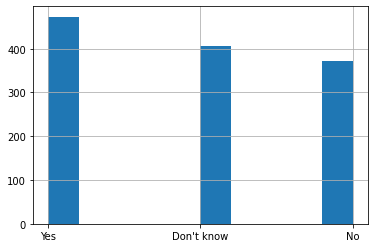

In [ ]:
df['benefits'].hist();


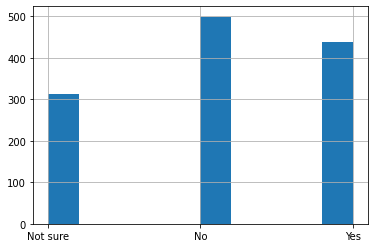

In [ ]:
df['care_options'].hist();


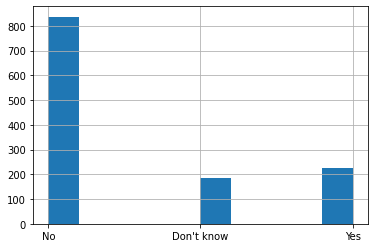

In [ ]:
df['wellness_program'].hist();


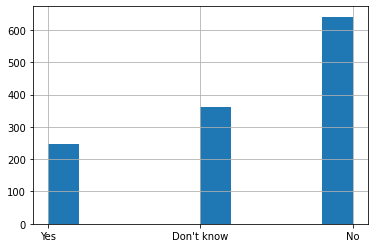

In [ ]:
df['seek_help'].hist();


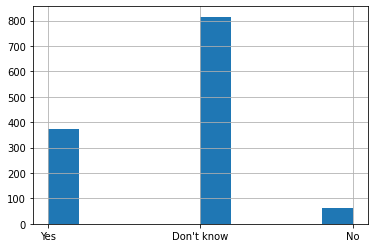

In [ ]:
df['anonymity'].hist();


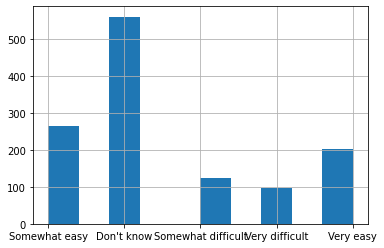

In [ ]:
df['leave'].hist();


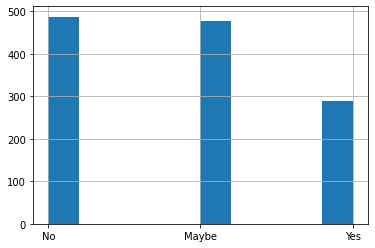

In [ ]:
df['mental_health_consequence'].hist();


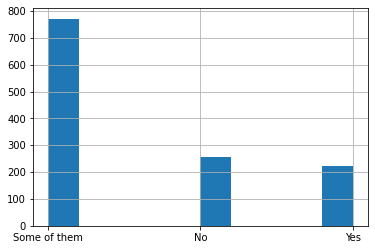

In [ ]:
df['coworkers'].hist();


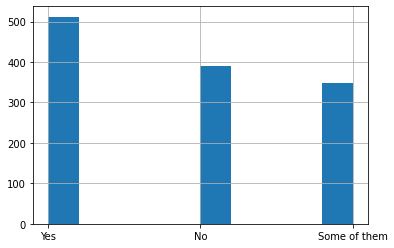

In [ ]:
#target variable
df['supervisor'].hist();


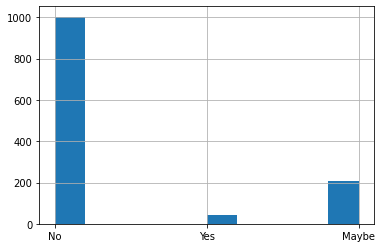

In [ ]:
df['mental_health_interview'].hist();


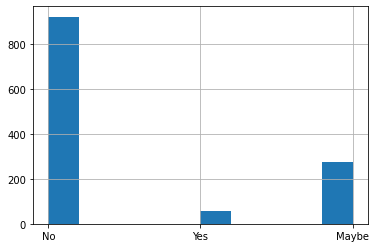

In [ ]:
df['phys_health_consequence'].hist();


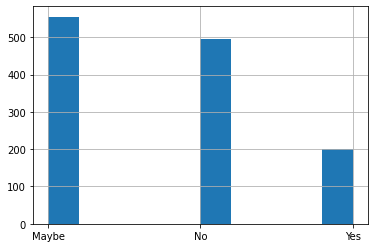

In [ ]:
df['phys_health_interview'].hist();


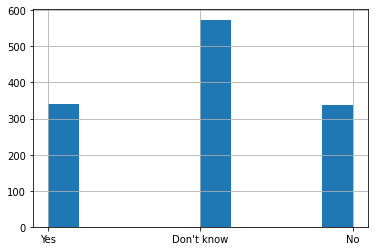

In [ ]:
df['mental_vs_physical'].hist();


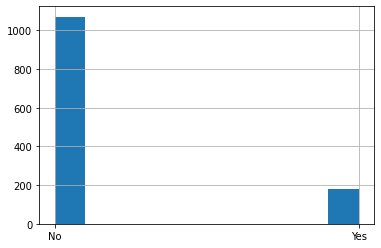

In [ ]:
df['obs_consequence'].hist();

Identified outliers:

There are very few self-employed people in this study. The majoirty of participants are male. Most participants are in their 30's, with some outliers in their 60s and 70s. Most of the participants work at tech companies. Most would not have anonymity if they talked about their mental health. Most of them did not have a mental health interview for their job.


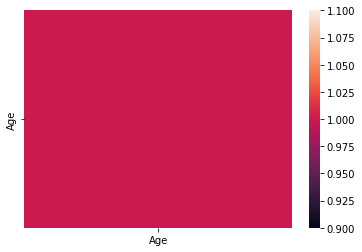

In [ ]:
#produce a correlation heatmap and identify any moderate or strong correlations 
#between your target and your features and/or between one feature and anothe
corr=df.corr()
sns.heatmap(corr) 

A heatmap at this point is pointless because I only have one numerical feature.